In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [232]:
df = pd.read_csv("insurance.csv")
#df.head()
#df.columns
df["sex"] == "female"

In [ ]:
female_df = df[df["sex"] == "female"]
female_df.describe()
female_df_smoker = female_df.groupby("smoker").get_group("yes")
female_df_nonsmoker = female_df.groupby("smoker").get_group("no")

In [ ]:
male_df = df[df["sex"] == "male"]
male_df.describe()
male_df_smoker = male_df.groupby("smoker").get_group("yes")
male_df_nonsmoker = male_df.groupby("smoker").get_group("no")

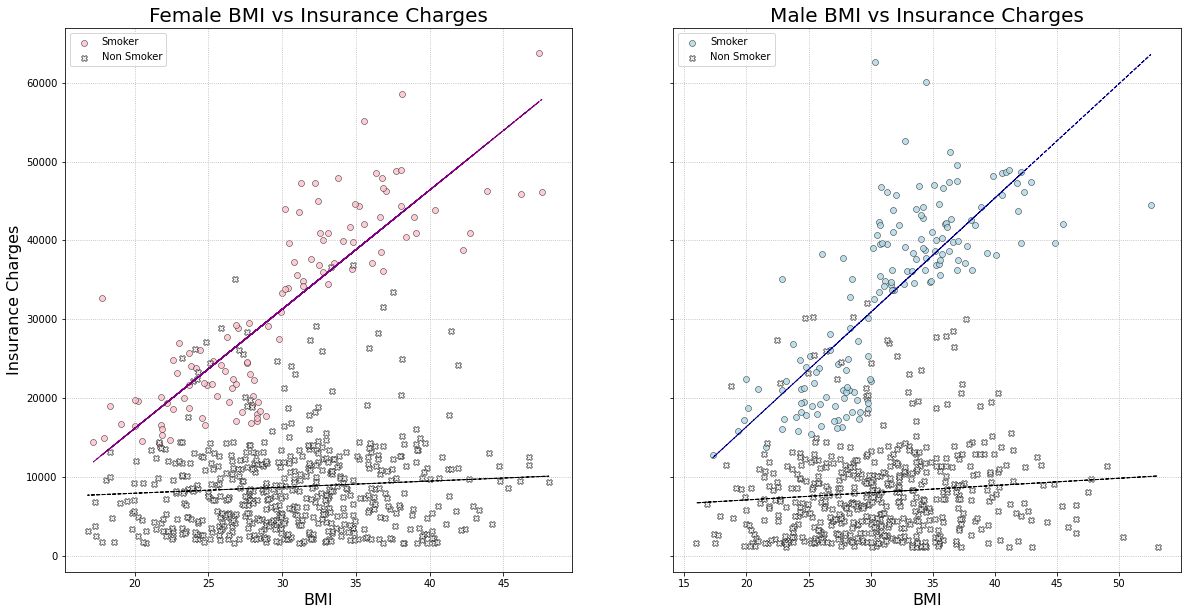

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [437]:
# Female scatter graph to compare BMI v insurance cost for smokers and non-smokers
x = female_df_smoker["bmi"]
y = female_df_smoker["charges"]

x_2 = female_df_nonsmoker["bmi"]
y_2 = female_df_nonsmoker["charges"]


# Creates subplots to allow female and male graphs to be plotted side by side
fig, axs = plt.subplots(1,2, figsize=(20,10), sharey='row')
ax1,ax2 = axs

ax1.scatter(x, y, label="Smoker", alpha=.8, edgecolor="black", linewidth=0.5, color="pink")
ax1.scatter(x_2, y_2, marker="X",label="Non Smoker", alpha=.8, edgecolor="black", linewidth=0.7, color="white")

ax1.set_title("Female BMI vs Insurance Charges", fontsize=20)
ax1.set_xlabel("BMI", fontsize=16)
ax1.set_ylabel("Insurance Charges", fontsize=16)

ax1.grid(True, linestyle=":")
ax1.legend()


#converting pandas df to numpy array to create line of best fit
# Done for smokers and non-smokers to allow 2 lines of best fit on same graph
np.x = x.values
np.y = y.values
np.x_2 = x_2.values
np.y_2 = y_2.values

#line of best fit
a, b = np.polyfit(np.x,np.y,1)
ax1.plot(np.x,a*np.x+b, color="purple", linestyle="--", linewidth=1)

a, b = np.polyfit(np.x_2,np.y_2,1)
ax1.plot(np.x_2,a*np.x_2+b, color="black", linestyle="--", linewidth=1)

plt.figure(figsize=(5, 5))


# Repeat similar process as above for male data
x = male_df_smoker["bmi"]
y = male_df_smoker["charges"]

x_2 = male_df_nonsmoker["bmi"]
y_2 = male_df_nonsmoker["charges"]

ax2.set_title("Male BMI vs Insurance Charges", fontsize=20)
ax2.set_xlabel("BMI",  fontsize=16)

ax2.scatter(x, y, label="Smoker", alpha=.8, edgecolor="black", linewidth=0.5, color="lightblue")
ax2.scatter(x_2, y_2, marker="X",label="Non Smoker", alpha=.8, edgecolor="black", linewidth=0.7, color="white")

ax2.grid(True, linestyle=":")
ax2.legend()


#converting pandas df to numpy array
np.x = x.values
np.y = y.values
np.x_2 = x_2.values
np.y_2 = y_2.values

#line of best fit
a, b = np.polyfit(np.x,np.y,1)
ax2.plot(np.x,a*np.x+b, color="darkblue", linestyle="--", linewidth=1)

a, b = np.polyfit(np.x_2,np.y_2,1)
ax2.plot(np.x_2,a*np.x_2+b, color="black", linestyle="--", linewidth=1)

plt.figure(figsize=(5, 5))

fig.savefig('BMI and Insurance visualisation.pdf', dpi=100)

plt.show()
